# Project: Wrangle and Analyze Data (WeRateDogs tweet archive)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#accessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#visualizing">Analyzing, and Visualizing Data</a></li>
<li><a href="#reporting">Reporting</a>
    <ul>
       <li><a href="#reporting-data">Data wrangling</a></li>
        <li><a href="#reporting-visuals">Data analyses and Visualizations</a></li>
    </ul>
    </li>
</ul>


<a id='intro'></a>
## Introduction

The dataset that I will will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The WeRateDogs archive contains basic tweet data for all 5000+ tweets, but not everything.

I will be using Python and its libraries, to gather data from a variety of sources and access and clean it from tidiness and quality issues. and also, use said tools to showcase my wrangling efforts through analysis and visualizations.

### Importing the necessary libraries to be used for the analysis

In [342]:
# importing the necessary libraries
import pandas as pd
import numpy as np
#import tweepy as tp
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gathering'></a>
## Gathering Data

First we load the `twitter_archive_enhanced.csv` that has been given us

In [343]:
# load the dataset
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


For the second dataset, we have been given a `url`to the file, we will save the file as `image_predictions.tsv`

In [344]:
# The url for the file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#The file name
file_name = "image_predictions.tsv"

#We create the file and write to it
if not os.path.isfile(file_name):
    with open(file_name, "wb") as file_obj:
        response = requests.get(url)
        file_obj.write(response.content)

We now load the `image_predictions.tsv`

In [345]:
# load the file
image_pred = pd.read_csv("image_predictions.tsv", delimiter="\t")
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


For the third dataset, we have to use Twitter API to get the `favorite` and `retweet` counts from the WeRateDogs Twitter account. 

In [346]:
# # Initializing the necessary variables
# consumer_key = ""
# consumer_secret = ""
# access_token = ""
# access_secret = ""
# # Tokens are removed for security purpose

# # Initiating the tweepy object
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # Making the API ready to query
# api = tweepy.API(auth, wait_on_rate_limit=True)

I will create function to help with querying twitter data

In [347]:
# set a function to query twitter API
def query_twitter(tweet_id):
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

I can call the above function using the `tweet_id` column of `twitter_archive` dataset

In [348]:
# calling the function
# query_twitter(twitter_archive.twitter_archive)

Unfortunately, I  was not granted developer privilege by Twitter. Hence, I will be making use of the `tweet_json.txt` file provided.

We will open the file and read it line by line, using the information in the data to create a list of dictionaries, which we will use to create dataframe.

In [349]:
df_list = []

with open("tweet_json.txt", "r") as file:
    for line in file:
        data = json.loads(line)
        id_str = data.get("id_str")
        favorite_count = data.get("favorite_count")
        retweet_count = data.get("retweet_count")
        
        df_list.append({"tweet_id": id_str,
                          "favorite_count": favorite_count,
                          "retweet_count": retweet_count})
        
retweet_favorite_count = pd.DataFrame(df_list)
        

In [350]:
retweet_favorite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


<a id='accessing'></a>
## Assessing Data

In this stage of the data wrangling process, we will aquaint ourselves with the datasets. We will check the datasets for quality and tidiness issues, using both visual and programmatic assessments.

### Visual Assessment

Assessing the dataset visually

In [351]:
# Display 'twitter_archive' dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [352]:
# display 'image_pred' dataset
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [353]:
# Display 'retweet_favorite_count' dataset
retweet_favorite_count

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Programmatic assessment

Assessing the dataset programmatically

In [354]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Issues Found:

- `timestamp` datatype
- dataset still has retweets
- unneeded columns (`retweeted_status_id`, `retweeted_status_user_id`)
- Dog stages in different columns

In [355]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issues Found

- Dog predictions in different columns

In [356]:
retweet_favorite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [357]:
# Checking the columns
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [358]:
# checking if the columns have duplicates
all_columns = pd.Series(list(twitter_archive) + list(image_pred) + list(retweet_favorite_count))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [359]:
# Checking the dog names
twitter_archive.name.value_counts().head(50), twitter_archive.name.value_counts().index

(None        745
 a            55
 Charlie      12
 Cooper       11
 Lucy         11
 Oliver       11
 Tucker       10
 Penny        10
 Lola         10
 Winston       9
 Bo            9
 Sadie         8
 the           8
 Daisy         7
 Buddy         7
 Toby          7
 an            7
 Bailey        7
 Leo           6
 Oscar         6
 Stanley       6
 Rusty         6
 Bella         6
 Dave          6
 Jack          6
 Koda          6
 Scout         6
 Jax           6
 Milo          6
 Louis         5
 Phil          5
 Sammy         5
 Gus           5
 Chester       5
 Alfie         5
 Sunny         5
 Bentley       5
 very          5
 Oakley        5
 Finn          5
 George        5
 Larry         5
 Clarence      4
 Loki          4
 Walter        4
 Reggie        4
 Hank          4
 Scooter       4
 Duke          4
 quite         4
 Name: name, dtype: int64,
 Index(['None', 'a', 'Charlie', 'Cooper', 'Lucy', 'Oliver', 'Tucker', 'Penny',
        'Lola', 'Winston',
        ...
     

#### Issues Found

- Invalid dog names

In [360]:
# checking if the invalid dog names are those lower case
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [361]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [362]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [363]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [364]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [365]:
twitter_archive.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

#### Issues Found

- Tweet link found at the end of the text

In [366]:
twitter_archive.source[4]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### Issues Found

- The tweet source has tags

In [367]:
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [368]:
image_pred.p1_dog

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071    False
2072     True
2073     True
2074    False
Name: p1_dog, Length: 2075, dtype: bool

In [369]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [370]:
twitter_archive.groupby("doggo").size().reset_index()

,doggo,0
0,None,2259
1,doggo,97


In [371]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### We now document the issues found while accessing the datasets

### Quality Issues

`twitter_archive` dataset

- Erroneous datatype (timestamp)
- Only original tweets should be in the dataset (no retweets)
- Incorrect names like 'an', 'a', 'the', 'light', 'old'
- In the `text` column, the text has the tweet link at the of the text (should only have the text)
- The `source` column should have only the `HTML` content (without the tags)
- There are features that are not needed like `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, etc. 
- Incorrect numerator and denominator ratings

`image_pred` dataset

- There are dog predictions that are false, which means they are not Dogs
- The names of Dog breeds is not standardized (the names are are not in title case)

### Tidiness Issues

`twitter_archive` dataset

- The `dog_stage` are in separate columns (`doggo`, `floofer`, `pupper`,`puppo`)

`image_pred` dataset

- The predictions should be in one column


### All dataset

- Combine all datasets

<a id='cleaning'></a>
## Cleaning Data

In this data wrangling stage, we will start working on the issues we identified in the assessing data stage.

First, I will make a copy of the original datasets.

In [372]:
# Making copies of the original datasets
twitter_archive_clean = twitter_archive.copy()
retweet_favorite_count_clean = retweet_favorite_count.copy()
image_pred_clean = image_pred.copy()

We will first clean the tidiness issues (structural issues) to make our the cleaning process easier.

### Tidiness Issues

#### `image_pred` dataset

### Issue #1: The predictions should be in one column



### Define

- Create a column called `dog_breed` to hold the a dog's breed, and then check the confidence level of each prediction to decide .
- Drop the columns that are no longer needed.

### Code

I will write a custom function to do this

In [373]:
def condition(df):
    if df[0] == True:
        return df[1]
    elif df[2] == True:
        return df[3]
    else:
        return df[4]

In [374]:
# we now call the function
p_cols = ["p1_dog", "p1", "p2_dog", "p2", "p3"]
c_cols = ["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3"]
image_pred_clean["dog_breed"] = image_pred_clean[p_cols].apply(condition, axis=1)
image_pred_clean["conf"] = image_pred_clean[c_cols].apply(condition, axis=1)


In [375]:
# dropping the columns that are not needed
image_pred_clean.drop(columns=["p1_dog", "p1", "p2_dog", "p2", "p3", "p1_conf", "p2_conf", "p3_conf", "p3_dog"], inplace=True)

### Test

In [376]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'conf'], dtype='object')

In [377]:
image_pred_clean.dog_breed.head(), image_pred_clean.conf.head()

(0    Welsh_springer_spaniel
 1                   redbone
 2           German_shepherd
 3       Rhodesian_ridgeback
 4        miniature_pinscher
 Name: dog_breed, dtype: object,
 0    0.465074
 1    0.506826
 2    0.596461
 3    0.408143
 4    0.560311
 Name: conf, dtype: object)

In [378]:
image_pred_clean.shape[1]

5

`twitter_archive` dataset

### Issue #2: The 'dog_stage' are in separate columns (doggo, floofer, pupper,puppo)



Here, we want to reshape the table, so that the various dog stages doggo, pupper, puppo, and floofer will be in one column named dog_stage.

### Define

- Extract the 'dog stage' from the `text` column into `dog_stage`
- Drop the columns that are no longer needed

### Code

In [379]:
# Using regular expression to extract 'dog stage'
twitter_archive_clean["dog_class"] = twitter_archive_clean['text'].str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True) 

# Dropping the the columns that are not needed columns
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test

In [380]:
twitter_archive_clean.dog_class.value_counts()

pupper     241
doggo       83
puppo       29
floofer      4
Name: dog_class, dtype: int64

In [381]:
twitter_archive_clean.columns, twitter_archive_clean.shape

(Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
        'rating_denominator', 'name', 'dog_class'],
       dtype='object'),
 (2356, 14))

### Quality Issues

`twitter_archive` dataset

### Issue #3: Erroneous datatype (timestamp)

### Define

- Convert the `timestamp` column to `datetime` datatype

### Code

In [382]:
# converting to datetime
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean.timestamp, format="%Y-%m-%d %H:%M:%S")

### Test

In [383]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [384]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #4: Only original tweets should be in the dataset (no retweets)


In the order to do this, we need to filter the dataset for rows where the `in_reply_to_status_id` and `in_reply_to_user_id` is not `null`

### Define 

- Filter the dataset to remove rows where `in_reply_to_status_id` and `in_reply_to_user_id` is not `null

### Code

In [385]:
# removing the rows that are retweets
mask = (twitter_archive_clean.in_reply_to_status_id.notnull()) & (twitter_archive_clean.in_reply_to_user_id.notnull())
original_tweets = twitter_archive_clean[mask]
twitter_archive_clean.drop(index=original_tweets.index, inplace=True)

### Test

In [386]:
twitter_archive_clean[mask]

C:\Users\Russell\AppData\Local\Temp\ipykernel_7876\4132267009.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_clean[mask]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class


In [387]:
twitter_archive_clean[mask].shape

C:\Users\Russell\AppData\Local\Temp\ipykernel_7876\1718536541.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_clean[mask].shape


(0, 14)

### Issue #5:  Incorrect names like 'an', 'a', 'the', 'light', 'old'

Note: It seems that the incorrect names are in lower case, and the names that could not be identified are represented as `None`

### Define

- Replace the incorrect names, as well as the ones represented as `None`  with `NaN`'s

### Code

In [388]:
# Replacing the incorrect names
mask = twitter_archive_clean.name.str.islower()
l_case = twitter_archive_clean[mask]
twitter_archive_clean.loc[l_case.index, "name"] = np.nan

#Replacing the 'None' values with 'Nan's
twitter_archive_clean.name.replace("None", np.nan, inplace=True)

### Test

In [389]:
twitter_archive_clean.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 930, dtype: int64

### Issue #6:   In the `text` column, the text has the tweet link at the of the text (should only have the text)

As was identified during the `assess` stage of the data wrangling process, the link is at the end of the text.

### Define

- Identify the `Regex` pattern
- Replace the link with an empty string and remove any trailing spaces

### Code

In [390]:
# Identifying the regex pattern
twitter_archive_clean.text[7]

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"

In [391]:
# Replacing the link with empty string
twitter_archive_clean.text = twitter_archive_clean.text.str.replace("(https://[\w\/\.]+$)", "", regex=True)

# removing trailing spaces
twitter_archive_clean.text = twitter_archive_clean.text.str.strip()

### Test

In [392]:
twitter_archive_clean.text[7]

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10"

In [393]:
twitter_archive_clean.text.str.contains("(https://[\w\/\.]+$)", regex=True)

C:\Users\Russell\AppData\Local\Temp\ipykernel_7876\993867916.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean.text.str.contains("(https://[\w\/\.]+$)", regex=True)


0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: text, Length: 2278, dtype: bool

### Issue #7: The `source` column should have only the `HTML` content (without the tags)


I will still use `Regex` to extract the HTML content

### Define

- Check the `source` column to identify the `Regex` pattern
- Extract the source content from the tags

### Code

In [394]:
# checking the source column
twitter_archive_clean.source[6]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [395]:
# extracting the source content from the html tags
twitter_archive_clean['source'] = twitter_archive_clean.source.str.extract("\>(.*?)\<", expand = True)

### Test

In [396]:
twitter_archive_clean.source[7]

'Twitter for iPhone'

### Issue #8: - There are features that are not needed like `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, etc



### Define

- Remove the columns that are no longer needed like `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, etc

### Code

In [397]:
# Removing the columns that are not needed
cols_drop = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_status_id", "in_reply_to_user_id"]
twitter_archive_clean.drop(columns=cols_drop, inplace=True)

### Test

In [398]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class'],
      dtype='object')

### Issue #9: - Incorrect numerator and denominator ratings


`image_pred` dataset

### Define

- Find all instances of ratings in the `text` column
- Split ratings found into different columns
- Select the latest rating 
- Remove trailing period (.)
- Split the ratings into `num` and `den` columns
- Replace the values in `den` to `10` where the values are not 
- Replace the values in `num` with the `mean` where the values are greater than `20`
- Replace the columns `ratings_numerator` and `ratings_denominator with `num` and `den` respectively
- Drop unnecessary columns


### Code

In [399]:
# Find ratings in the text
twitter_archive_clean['ratings'] = twitter_archive_clean.text.str.findall(r"\d*\.?\d+\/\d+").str.join(',')
twitter_archive_clean[['first', 'second', 'third']] = twitter_archive_clean.ratings.str.split(',', expand=True)

# resetting index
twitter_archive_clean.reset_index(inplace=True)


# Create boolean columns to select the latest ratings
twitter_archive_clean["is_first"] = twitter_archive_clean["first"].apply(lambda x: True if x else False)
twitter_archive_clean["is_second"] = twitter_archive_clean["second"].apply(lambda x: True if x else False)
twitter_archive_clean["is_third"] = twitter_archive_clean["third"].apply(lambda x: True if x else False)

# Select the latest ratings
cols = ["is_third", "third", "is_second", "second", "first", "ratings"]
twitter_archive_clean["ratings"] = twitter_archive_clean[cols].apply(condition, axis=1)

# Removing the trailing spaces
twitter_archive_clean.ratings = twitter_archive_clean.ratings.str.strip('.')
twitter_archive_clean[['num', 'den']] = np.round(twitter_archive_clean['ratings'].str.split('/', n=1, expand=True).astype(float)).astype(int)


In [400]:
# assigning the right values to denominator
mask_den = twitter_archive_clean.den != 10
twitter_archive_clean.loc[mask_den, "den"] = 10

# assigning the right values to numerator
#mask_num = twitter_archive_clean.num > 20
#twitter_archive_clean.loc[mask_num, "num"] = int(np.mean(twitter_archive_clean.num))

# Assigning the right values to rating_numerator and rating_denominator
twitter_archive_clean["rating_numerator"] = twitter_archive_clean.num
twitter_archive_clean["rating_denominator"] = twitter_archive_clean.den

# Drop unnecessary columns
cols_drop = ["first", "is_first", "second", "is_second", "third", "is_third", "num", "den", "index"]
twitter_archive_clean.drop(columns=cols_drop, axis=1, inplace=True)


### Test

In [401]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class',
       'ratings'],
      dtype='object')

In [402]:
twitter_archive_clean.rating_numerator.unique(), twitter_archive_clean.rating_denominator.unique()

(array([  13,   12,   14,   11,   10,    6,   15,    0,   84,    7,    9,
          24,    8,    1,    5,    3,    4,  165, 1776,  204,   99,   80,
          45,   60,    2,   44,  121,  144,   88,  420]),
 array([10]))

### Issue #10: The names of Dog breeds is not standardized (the names are are not in title case)

### Define

- Change all dog breed names to titlecase

### Code

In [403]:
#Changing to titlecase
image_pred_clean["dog_breed"] = image_pred_clean.dog_breed.str.title()

### Test

In [404]:
image_pred_clean.dog_breed.sample(5)

1035      Lakeland_Terrier
1386               Redbone
1575      Golden_Retriever
1512      Golden_Retriever
494     Standard_Schnauzer
Name: dog_breed, dtype: object

Before merging the datasets, I will like to change the `tweet_id` column in the `twitter_archive_clean` and `image_pred_clean` dataset to `string` (object)

In [405]:
twitter_archive_clean["tweet_id"] = twitter_archive_clean.tweet_id.astype(str)
image_pred_clean["tweet_id"] = image_pred_clean.tweet_id.astype(str)

### Merging all Dataset

In [406]:
# Merging all the  dataset
retweet_favorite_count_clean.tweet_id
twitter_archive_master = twitter_archive_clean.merge(retweet_favorite_count_clean, on="tweet_id", how="inner").merge(image_pred_clean, on="tweet_id", how="inner")

In [407]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class',
       'ratings', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'dog_breed', 'conf'],
      dtype='object')

In [408]:
twitter_archive_master.shape

(2050, 16)

<a id='storing'></a>
## Storing Data

In this stage, we want to save the `twitter_archive_master` dataset as a `csv` file.

In [409]:
# Saving as csv
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

<a id='visualizing'></a>
## Analyzing, and Visualizing Data

In this stage we are going to use our cleaned dataset to get insights through analysis and visualizations. I will use some questions to answer this.

###### 1. Which dog breed seem to have the highest rating?
##### 2.  What is the most popular dog name?
###### 3. What is most source of tweets?
###### 4 What is the most occurring dog stage?

Let make a copy of the master dataset

In [410]:
# making a copy of the dataset
twitter_master_df = twitter_archive_master.copy()


#### #1 Which dog breed seem to have the highest rating?

In [411]:
# getting the top most occuring dog breed
top_dog_breed_count = twitter_master_df.dog_breed.value_counts()[:20]
top_dog_breed = twitter_master_df[twitter_master_df.dog_breed.isin(top_dog_breed_count.index)]

# Group the genres
top_dog_breed_group = top_dog_breed.groupby("dog_breed")

# computing the mean, resetting the index and sorting by ratings
dog_breed_ratings = top_dog_breed_group.rating_numerator.mean().reset_index().sort_values("rating_numerator", ascending=False)
dog_breed_ratings

,dog_breed,rating_numerator
4,Chow,14.039216
10,Labrador_Retriever,13.549550
9,Golden_Retriever,12.251462
16,Samoyed,11.717391
5,Cocker_Spaniel,11.411765
6,Eskimo_Dog,11.409091
13,Pembroke,11.382979
17,Siberian_Husky,11.300000
7,French_Bulldog,11.281250
1,Cardigan,11.173913


#### We want to create a custom function to help us with our visualizations.

In [412]:
def custom_plot(df, col, title, xlabel, ylabel, figsize=(16, 8), add_mean=False, 
    plot_type="line", xticks="Keep_original", legend:list=[],
    legend_loc="upper left", *plot_args, **plot_kwargs):
    plt.clf()
    fig, ax = plt.subplots(figsize=figsize)

    # setting up the graph
    length = df.shape[0]
    x_tick_points = np.linspace(1, length, length)

    # getting the plot type
    function = ax.plot if plot_type == 'line' else ax.bar

    # getting the bar's width
    bar_width = plot_kwargs.get('width', 0)

    # drawing the graph
    if type(col) in [str, tuple, int]:
        function(x_tick_points, df[col], **plot_kwargs)
    elif type(col) == list:
        for idx, column in enumerate(col):
            function(x_tick_points + idx * bar_width, df[column], **plot_kwargs)
    if add_mean:
        mean_value = round(df[col].mean(), 2)
        ax.plot(x_tick_points, np.repeat(mean_value, length), "--")

    x_tick_position = 0
    if plot_type == "bar" and type(col) == list:
        bar_width = bar_width or 0.6
        x_tick_position = bar_width * ((len(columns) - 1) / 2)

    if add_mean and not legend:
        # Changing column names to legend lists
        columns = [col] if type(col) in [str, int, tuple] else columns
        columns = [' '.join(str(column).split('_')).title() for column in columns]
        legend += columns
        legend.append("Mean")
    elif len(legend) and add_mean:
        legend.append("Mean")

    if len(legend):
        plt.legend(legend, loc=legend_loc, fontsize=12)

    legend.clear()
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(x_tick_points + x_tick_position, df[xticks], rotation=45, horizontalalignment='right');

We want to now plot the `dog_breed_ratings` dataframe to visualize it.

<Figure size 432x288 with 0 Axes>

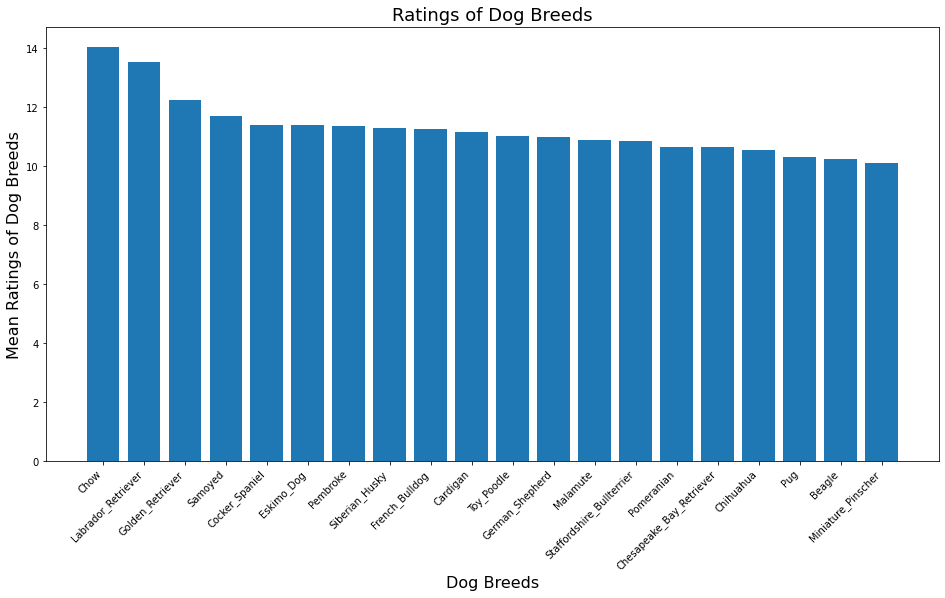

In [413]:
# we call the custom_plot function to plot the graph
custom_plot(dog_breed_ratings, "rating_numerator", "Ratings of Dog Breeds", "Dog Breeds", "Mean Ratings of Dog Breeds", xticks="dog_breed", plot_type="bar");

The dog_breed that has the highest average rating is chow rating is `Chow`.

#### #2 What is the most popular dog name?


In [414]:
# getting the most popular dog name
pop_dog_name = twitter_master_df.name.value_counts()[:20]
pop_dog_name

Charlie    11
Cooper     10
Lucy       10
Tucker     10
Oliver     10
Penny      10
Sadie       8
Bo          8
Winston     8
Lola        8
Toby        7
Daisy       7
Jax         6
Dave        6
Scout       6
Bella       6
Milo        6
Bailey      6
Stanley     6
Koda        6
Name: name, dtype: int64

In [415]:
# creating a dataframe for the plot
df = pd.DataFrame({"name": pop_dog_name.index, "count": pop_dog_name.values})
df

,name,count
0,Charlie,11
1,Cooper,10
2,Lucy,10
3,Tucker,10
4,Oliver,10
5,Penny,10
6,Sadie,8
7,Bo,8
8,Winston,8
9,Lola,8


<Figure size 432x288 with 0 Axes>

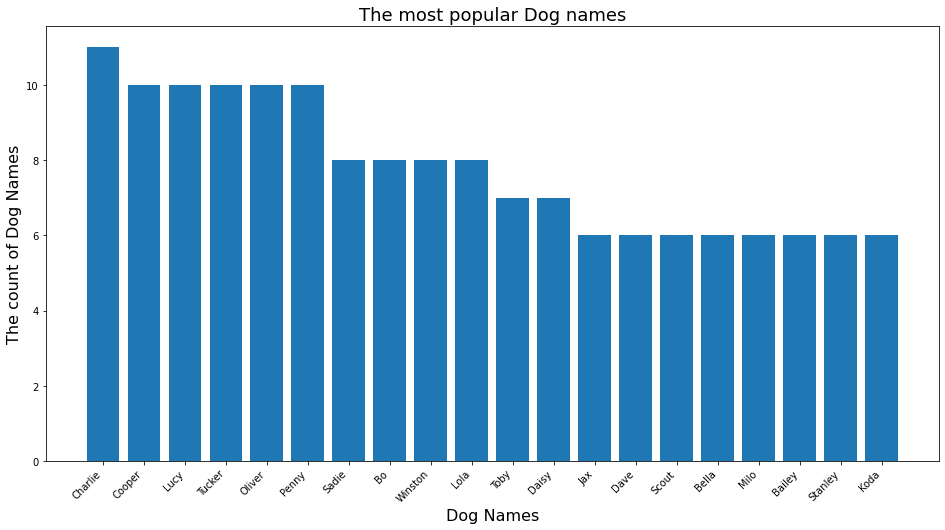

In [416]:
# we call the custom_plot function to plot the graph
custom_plot(df, "count", "The most popular Dog names", "Dog Names", "The count of Dog Names", xticks="name", plot_type="bar");

It seems the most popular Dog name is `Charlie`

#### #3 What is most source of tweets?

In [417]:
# getting the count of source of tweets
source_count = twitter_master_df.source.value_counts()
source_count

Twitter for iPhone    2009
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [418]:
# creating a dataframe for the plot
df = pd.DataFrame({"source": source_count.index, "count": source_count.values})
df

,source,count
0,Twitter for iPhone,2009
1,Twitter Web Client,30
2,TweetDeck,11


<Figure size 432x288 with 0 Axes>

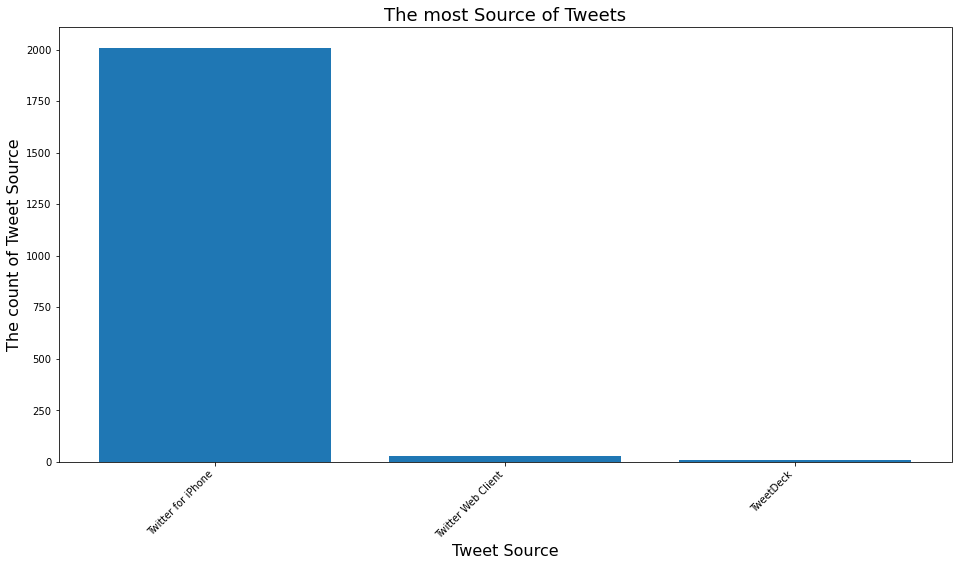

In [419]:
# we call the custom_plot function to plot the graph
custom_plot(df, "count", "The most Source of Tweets", "Tweet Source", "The count of Tweet Source", xticks="source", plot_type="bar");

From the visualization it points to the `Twitter for iphone` as the overwhelming source of tweets

#### #4 What is the most occurring dog stage

In [420]:
dog_class_count = twitter_master_df.dog_class.value_counts()
dog_class_count

pupper     205
doggo       68
puppo       23
floofer      3
Name: dog_class, dtype: int64

In [421]:
# creating a dataframe for the plot
df = pd.DataFrame({"dog_class": dog_class_count.index, "count": dog_class_count.values})
df

,dog_class,count
0,pupper,205
1,doggo,68
2,puppo,23
3,floofer,3


<Figure size 432x288 with 0 Axes>

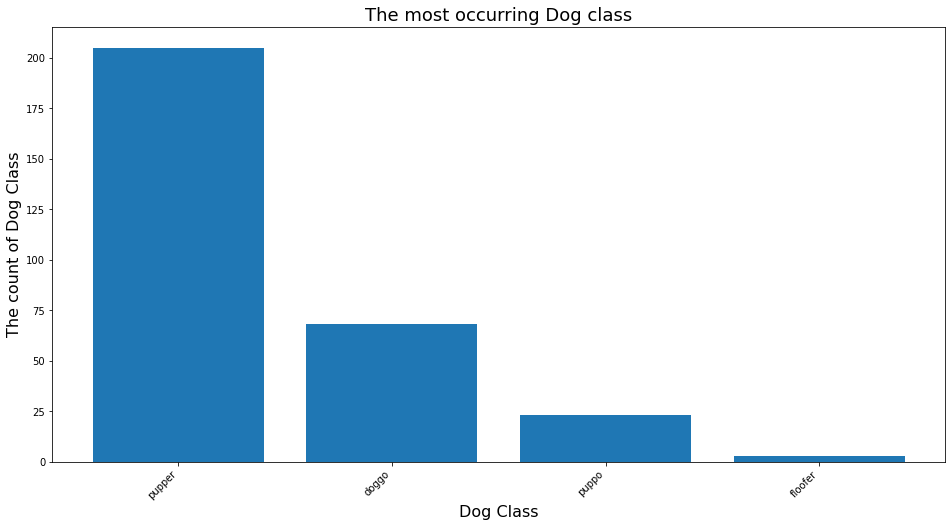

In [422]:
# we call the custom_plot function to plot the graph
custom_plot(df, "count", "The most occurring Dog class", "Dog Class", "The count of Dog Class", xticks="dog_class", plot_type="bar");

The most occurring Dog class is `pupper`

## Conclusions

> In this project data was collected from the WeRateDogs Twitter account.  

> The three datasets that were gathered were assessed, cleaned, and finally merged into one master dataset and stored as a file. 

> Using this cleaned dataset now, some insights were drawn form it. these are some of the insights:
> I discovered that `Chow` dog breed has the highest rating followed by Golden and Labrador Retrievers .
> I also discovered that Iphones are overwhelming the device use to send most of the tweets.
> The dog name that has the most popularity is `Charlie`
> And finally, the dog class that is most represented is `pupper`

In [423]:
twitter_master_df[twitter_master_df.dog_class == "pupper"].text[28]

'This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe'

In [424]:
twitter_master_df.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2045    Twitter for iPhone
2046    Twitter for iPhone
2047    Twitter for iPhone
2048    Twitter for iPhone
2049    Twitter for iPhone
Name: source, Length: 2050, dtype: object